# Euler method for solving first-order differential equations

The Euler method is a numerical algorithm for solving ordinary differential equations given an initial value.

Given an initial value, the method works by evaluating the function $f(x)$ at a point $x = x_{n+1}$ using straight line approximation with slope $f'(x)$ at $x = x_n$, where the step, $h =  x_{n+1} - x_n$.

Using the first principle of derivatives,
$$f'(x_0) = \lim_{h \rightarrow 0}  \frac{f(x_0 + h) - f(x_0)}{h}$$
Therfore, if $h$ is small enough,
$$\implies f(x_0 + h) = f(x_0) + h \cdot f'(x_0)$$


Another possible explanation of this approximation, can originate from the Taylor expansion,
$$f(x_0 + h) = f(x_0) + h \cdot f'(x_0) + h^2 \cdot f''(x_0) + h^3 \cdot f'''(x_0) + \dots$$

Since $h << 1$, ignoring the higher order terms the approximation becomes,
$$f(x_0 + h) = f(x_0) + h \cdot f'(x_0)$$

Then the function $f(x)$ at a generic point $x_n$ can be approximated using,
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1})$$

The intial value of $f(x)$ at $x = x_0$ must be provided, which will be the starting point for the Euler method algorithm. This will eliminate the constant we would have got from solving the first-order differential equation.

An Illustration of the Euler method is given below,
![resources/euler-1.png](resources/euler-1.png)

## Code

In [1]:
from numpy import cos, empty, exp, pi, sin
from matplotlib import pyplot as plt
from seaborn import set

# Default configuaration for matplotlib
plt.rcParams["figure.figsize"] = (16, 8)
set()

In [2]:
# Function to generate `n` evenly space points between limits `a` and `b`
def generate_points(a, b, h):

    # Calculating the number of points
    n = int(((b - a) / h) + 1)

    # Creating an empty array to store the points
    points = empty(n)

    # Generating the points
    for i in range(n):
        points[i] = a
        a += h

    return points

In [3]:
def solve_first_order_euler(y_prime, x_i, x_f, y_i, h):
    
    # Generating equispaced points
    x = generate_points(x_i, x_f, h)

    # Creating a array to store `y`
    y = empty(x.size)

    # Initialising `y` with initial value
    y[0] = y_i
    
    # Evaluating the function `y` at the remaining points
    for i in range(1, x.size):
        y[i] = y[i-1] + h * y_prime(x[i], y[i-1])

    return y

### $$\frac{dy}{dx} = y$$
$$y = Ae^x$$

In [4]:
y_prime = lambda x, y: y
x_i     = 0
x_f     = 5
y_i     = 1
h       = 0.1

In [5]:
points       = generate_points(x_i, x_f, h)

y_euler      = solve_first_order_euler(y_prime, x_i, x_f, y_i, h)
y_analytical = exp(points)

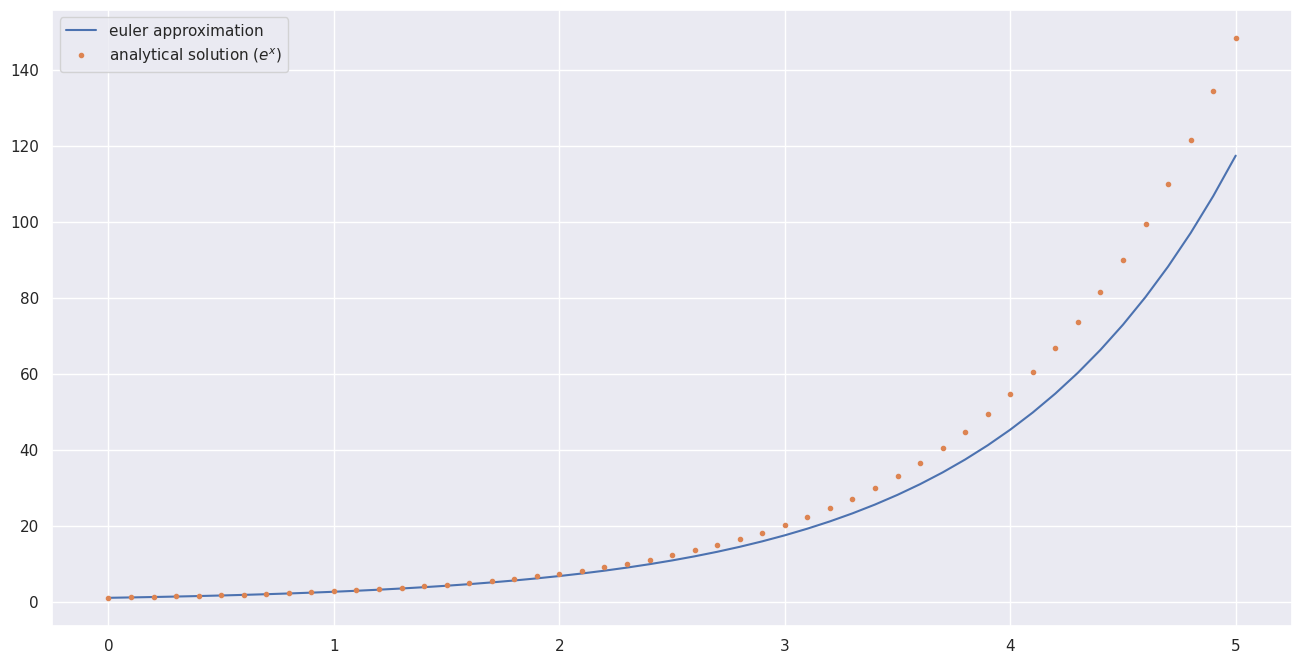

In [6]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_analytical, '.', label="analytical solution ($e^x$)")
plt.legend()

### $$\frac{dy}{dx} = sin(x)$$
$$y = -cos(x) + C$$

In [7]:
y_prime = lambda x, y: sin(x)
x_i     = 0
x_f     = 2 * pi
y_i     = - 1
h       = 0.1

In [8]:
points       = generate_points(x_i, x_f, h)

y_euler      = solve_first_order_euler(y_prime, x_i, x_f, y_i, h)
y_analytical = -cos(points)

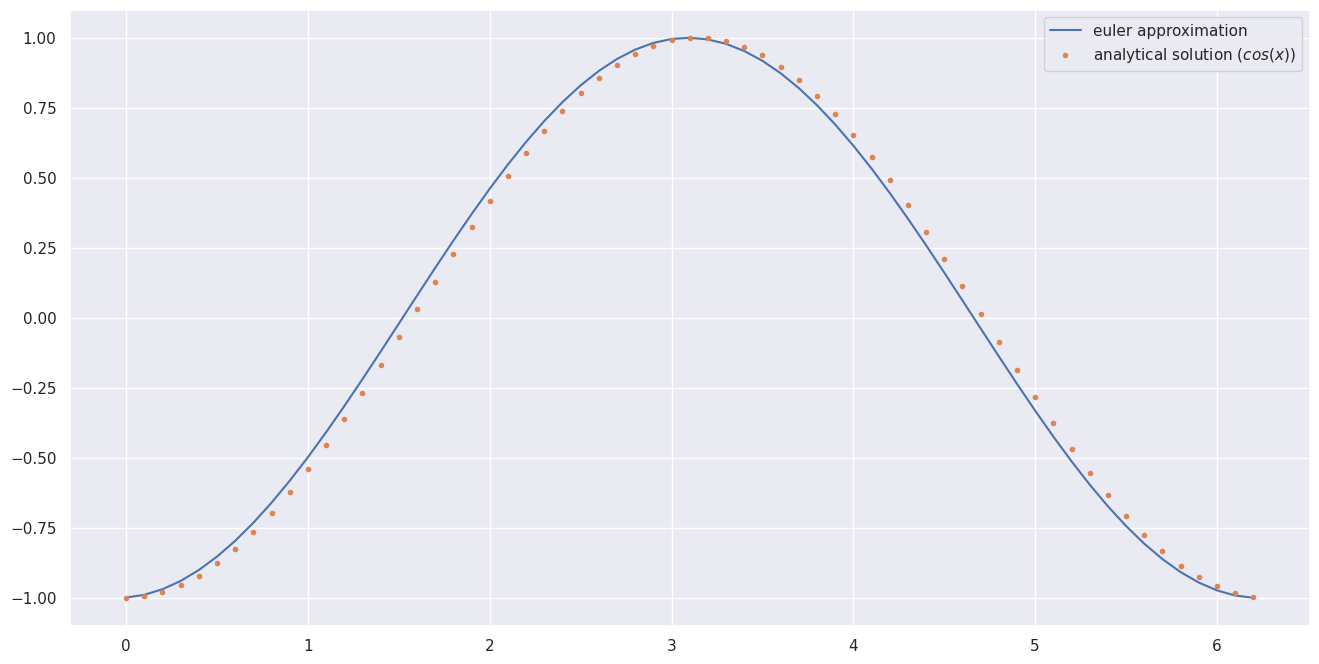

In [9]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_analytical, '.' , label="analytical solution ($cos(x)$)")
plt.legend()

# Euler method for solving second-order differential equations

Similar to the first order the seconf-order differential equations can also solved using the Euler method.

Previously we got,
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1})$$

Replacing $f(x_n)$ with its derivative,
$$f'(x_n) = f'(x_{n-1}) + h \cdot f''(x_{n-1})$$

Putting this equation into the previous one,
$$f(x_n) = f(x_{n-1}) + h \left[ f'(x_{n-1}) + h \cdot f''(x_{n-1}) \right]$$
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1}) + h^2 \cdot f''(x_{n-1})$$

Again we can also ge here from the Taylor expansion, but this time we have to considee upto the third term,
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1}) + h^2 \cdot f''(x_{n-1})$$

But while writing the code we will first eveluate the first derivaitve using the euler method and then again use the first derivetive to evalute the function itsef.
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1})$$
$$f'(x_n) = f'(x_{n-1}) + h \cdot f''(x_{n-1})$$

For this we would not only have to provide the initial value of $f(x)$, but also the intial value of $f'(x)$ both at $x= x_0$, which will be starting point for the Euler algorithm when solving for $f(X)$ and $f'()$. This would also eliminate the two constants we would have got from solving the second-order differential equations. 

In [10]:
def solve_second_order_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h):

    # Generating equispaced points
    x = generate_points(x_i, x_f, h)

    # Creating two arrays to store `y_prime` and `y`
    y_prime = empty(x.size)
    y = empty(x.size)

    # Initialising `y_prime` and `y` with initial values
    y_prime[0] = y_prime_i
    y[0] = y_i

    # Evaluating the function `y_prime` and `y` at the remaining points
    for i in range(1, x.size):
        y_prime[i] = y_prime[i-1] + h * y_prime_prime(x[i], y[i-1], y_prime[i-1])
        y[i] = y[i-1] + h * y_prime[i-1]

    return y

### $$\frac{d^2y}{dx^2} = y$$
$$y = e^{mx} + e^{-nx}$$

In [11]:
y_prime_prime = lambda x, y, y_prime: y
x_i           = 0
x_f           = 5
y_i           = 1
y_prime_i     = 1
h             = 0.1

In [12]:
points       = generate_points(x_i, x_f, h)

y_euler      = solve_second_order_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)
y_analytical = exp(points) - 1

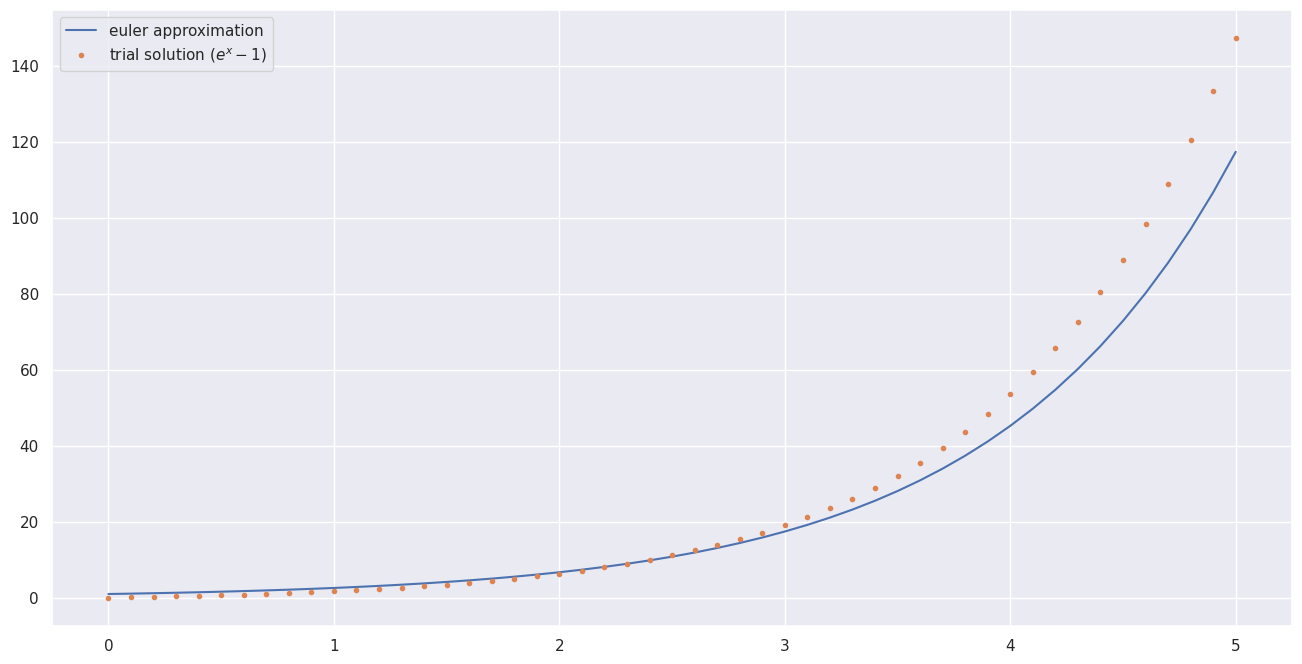

In [13]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_analytical, '.', label="trial solution ($e^x - 1$)")
plt.legend()

### $$\frac{d^2y}{dx^2} = -y$$
$$y = cos(mx) + sin(nx)$$

In [14]:
y_prime_prime = lambda x, y, y_prime: -y
x_i           = 0
x_f           = 2 * pi
y_i           = 0
y_prime_i     = 1
h             = 0.1

In [15]:
points       = generate_points(x_i, x_f, h)

y_euler      = solve_second_order_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)
y_analytical = sin(points)

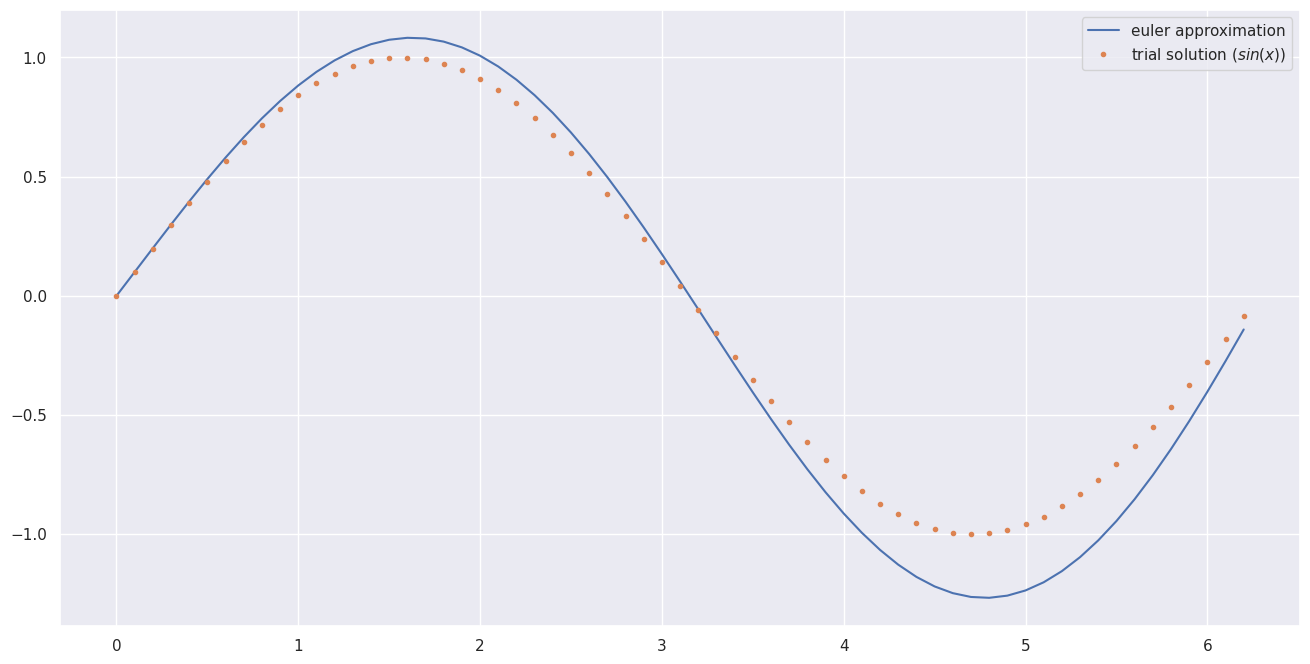

In [16]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_analytical, '.', label="trial solution ($sin(x)$)")
plt.legend()

## Real world physics problems

### $$\dots$$